In [40]:
import pandas as pd
import wntr
import networkx as nx
import matplotlib.pyplot as plt
import os
import seaborn as sns

def get_graph(variant):
    wn = wntr.network.WaterNetworkModel(f'variants/{variant}.inp')
    graph = wn.get_graph().to_undirected()

    pos = dict()
    for name in wn.node_name_list:
            node = wn.get_node(name)
            pos[name] = node.coordinates
    return graph, pos


In [53]:
resilience = pd.read_csv('results/resilience_normal.csv', index_col=0)
attributes = pd.read_csv('results/attributes_normal.csv', index_col=0)
resilience = resilience.drop('benchmark')

C:\Users\elir\AppData\Local\Temp\ipykernel_23312\3074064987.py:10: DeprecationWarning: wntr.network.WaterNetworkModel.get_graph is deprecated, use wntr.network.WaterNetworkModel.to_graph instead
  graph = wn.get_graph().to_undirected()


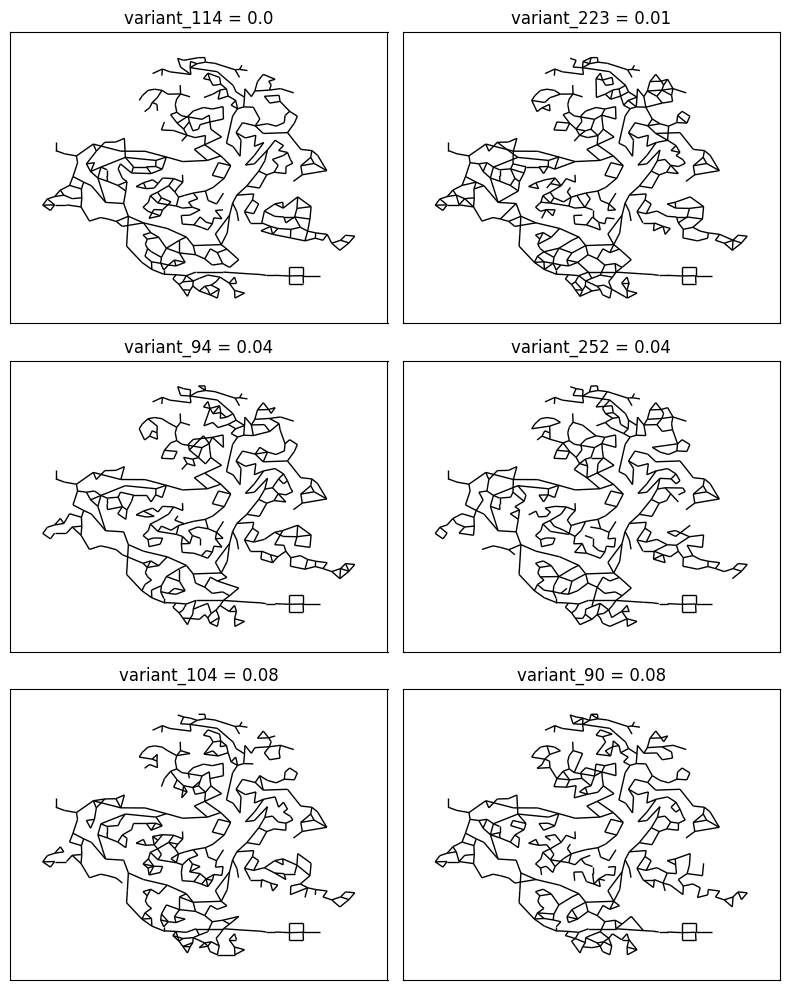

In [68]:
ascending = True
kpi = 'Np'

variants = resilience[kpi].sort_values(ascending=ascending).head(6).index.to_list()
fig, axs = plt.subplots(3, 2, figsize=(8,10))
n = 0
for x in range(3):
    for y in range(2):

        G, pos = get_graph(variants[n])
        nx.draw_networkx_edges(G, pos, ax=axs[x, y])
        axs[x,y].set_title(f'{variants[n]} = {round(resilience.loc[variants[n], kpi], 2)}')
        n += 1
plt.tight_layout()
plt.show()